In [ ]:
"PDI 2 - Luminancia y saturacion"

In [29]:
import cv2 #opencv
from matplotlib import pyplot as plt

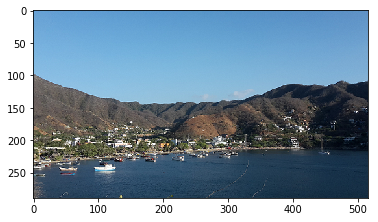

In [30]:
#cargar imagen       
image = cv2.imread(str("image.png"))

#tamano de la imagen
height, width, channels = image.shape  

#convierte la img a RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB, image)

#pinta la img nueva
plt.imshow(img)
plt.show()

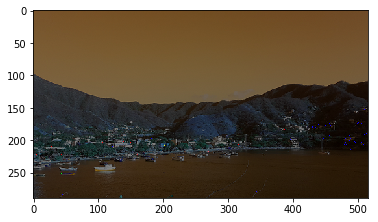

In [31]:
lum = float(0.5)
sat = float(0.7) 

#convierte RGB-YIQ-RGB 
global nR, bG, nB
global newimg, saveimg      
newimg = img
saveimg = img

for w in range(width):
    for h in range(height):
        r1, g1, b1 = tuple(img[h][w]) 
        #yiq = colorsys.rgb_to_yiq(r, g, b) OK 
        y1 = 0.299*r1 + 0.587*g1 + 0.114*b1
        i1 = 0.595716*r1 - 0.274453*g1 - 0.321263*b1
        q1 = 0.211456*r1 - 0.522591*g1 + 0.311135*b1                                                  
        #yiq alterada
        y2 = y1*lum
        i2 = i1*sat
        q2 = q1*sat                    
        #convierte de yiq a rgb
        r2 = int(y2 + 0.948262*i2 + 0.624013*q2)
        g2 = int(y2 - 0.276066*i2 - 0.639810*q2)
        b2 = int(y2 - 1.105450*i2 + 1.729860*q2)                              
        #nueva img                                                                                                              
        newimg[h, w] = [r2, g2, b2]
        saveimg[h, w] = [r2, g2, b2]
                
#guarda la img nueva
cv2.cvtColor(saveimg, cv2.COLOR_BGR2RGB, saveimg)   
cv2.imwrite('newimage.png', saveimg)
        
#pinta la img nueva
plt.imshow(newimg)
plt.show()